**Important Note:- This script was created in google collap**

# **Install dependencies**

In [ ]:
!pip install pandas
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Import libraries & setup the data directory**

In [ ]:
import os
import re
import glob
import shutil
import string
import pathlib


# set the data directory
data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','data'))

# give matplotlib a folder to save its configs
os.environ['MPLCONFIGDIR'] = os.path.join(data_dir,'plt_configs')
import matplotlib.pyplot as plt

#give huggingface a folder to save its stuff in too
#you only need this if you are using a huggingface dataset
os.environ['HF_HOME'] = os.path.join(data_dir,'hf_cache')
import datasets

import PIL
import PIL.Image

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import load_model

In [ ]:
# setup directories, create them if they do not exist within data folder

# I want my data directory to contain two folders, one for each class I am predicting ("cats" or "dogs")

animals_dir = os.path.join(data_dir,'animals')
if not os.path.exists(animals_dir):
    os.makedirs(animals_dir)
    
cats_dir = os.path.join(data_dir,'animals','cats')
if not os.path.exists(cats_dir):
    os.makedirs(cats_dir)
    
dogs_dir = os.path.join(data_dir,'animals','dogs')
if not os.path.exists(dogs_dir):
    os.makedirs(dogs_dir)

# **Download the dataset**

* [cats_vs_dogs](https://huggingface.co/datasets/cats_vs_dogs)

In [ ]:
dataset = datasets.load_dataset("cats_vs_dogs")


Generating train split:   0%|          | 0/23410 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /data/hf_cache/datasets/cats_vs_dogs/default/1.0.0/d4fe9cf31b294ed8639aa58f7d8ee13fe189011837038ed9a774fde19a911fcb. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

# **Explore the dataset**

**Print first 5 records from dataset**

In [ ]:
animals_dataset = dataset['train'].to_pandas()
animals_dataset.head()

image  labels
0  {'bytes': None, 'path': '/data/hf_cache/datase...       0
1  {'bytes': None, 'path': '/data/hf_cache/datase...       0
2  {'bytes': None, 'path': '/data/hf_cache/datase...       0
3  {'bytes': None, 'path': '/data/hf_cache/datase...       0
4  {'bytes': None, 'path': '/data/hf_cache/datase...       0

**Length of animals dataset**

In [ ]:
len(animals_dataset)

23410

**Divide the dataset into 2 dataframes**

In [ ]:
cats_df = animals_dataset[animals_dataset['labels'] == 0]
dogs_df = animals_dataset[animals_dataset['labels'] == 1]

**Print first 5 records from cats dataframe**

In [ ]:
cats_df.head()

image  labels
0  {'bytes': None, 'path': '/data/hf_cache/datase...       0
1  {'bytes': None, 'path': '/data/hf_cache/datase...       0
2  {'bytes': None, 'path': '/data/hf_cache/datase...       0
3  {'bytes': None, 'path': '/data/hf_cache/datase...       0
4  {'bytes': None, 'path': '/data/hf_cache/datase...       0

**Print the path of first data from cats dataframe**

In [ ]:
cats_df['image'][0]['path']

'/data/hf_cache/datasets/downloads/extracted/af5967c91278a2737726ae0471f8dd14ce77a5350b62bc417fe60441f417146f/PetImages/Cat/0.jpg'

**Save all cat images into cats directory**

In [ ]:
for i in range(len(cats_df)):
    shutil.copyfile(cats_df['image'][i]['path'], os.path.join(cats_dir,str(i)+'.jpg'))

**Print the count of cat images available in the cat directory**

In [ ]:
image_count = len(list(pathlib.Path(cats_dir).glob('*.jpg')))
print(image_count)

11741


**Print the first image from cats directory**

(440, 415)


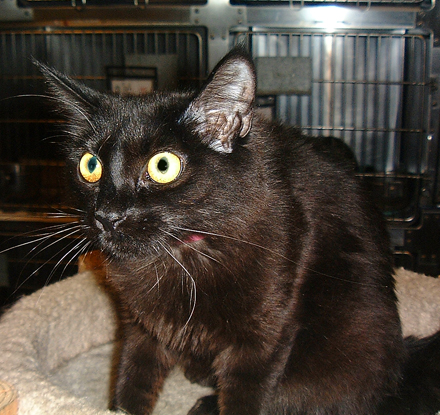

In [ ]:
cats = list(pathlib.Path(cats_dir).glob('*.jpg'))
print(PIL.Image.open(str(cats[0])).size)
PIL.Image.open(str(cats[0]))

**Print the second image from cats directory**

(500, 356)


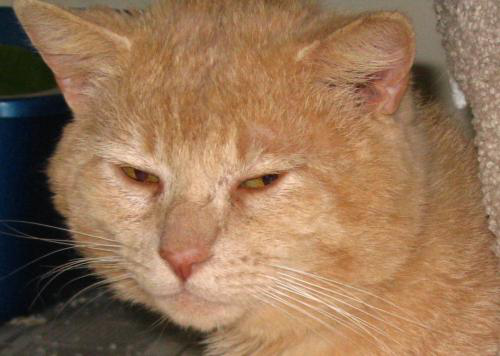

In [ ]:
print(PIL.Image.open(str(cats[1])).size)
PIL.Image.open(str(cats[1]))

**Print the last image from cats directory**

(500, 334)


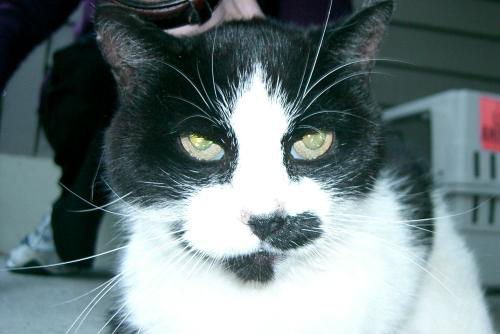

In [ ]:
print(PIL.Image.open(str(cats[-1])).size)
PIL.Image.open(str(cats[-1]))


**Print first 5 records from dogs dataframe**

In [ ]:
dogs_df.head()

image  labels
11741  {'bytes': None, 'path': '/data/hf_cache/datase...       1
11742  {'bytes': None, 'path': '/data/hf_cache/datase...       1
11743  {'bytes': None, 'path': '/data/hf_cache/datase...       1
11744  {'bytes': None, 'path': '/data/hf_cache/datase...       1
11745  {'bytes': None, 'path': '/data/hf_cache/datase...       1

**Print the path of first data from dogs dataframe**

In [ ]:
dogs_df['image'][11741]['path']

'/data/hf_cache/datasets/downloads/extracted/af5967c91278a2737726ae0471f8dd14ce77a5350b62bc417fe60441f417146f/PetImages/Dog/0.jpg'

**Save all dog images into dogs directory**

In [ ]:
for i in range(len(cats_df),len(animals_dataset)):
    shutil.copyfile(dogs_df['image'][i]['path'], os.path.join(dogs_dir,str(i)+'.jpg'))

**Print the count of dog images available in the dogs directory**

In [ ]:
image_count = len(list(pathlib.Path(dogs_dir).glob('*.jpg')))
print(image_count)

11669


**Print the first image from dogs directory**

(500, 375)


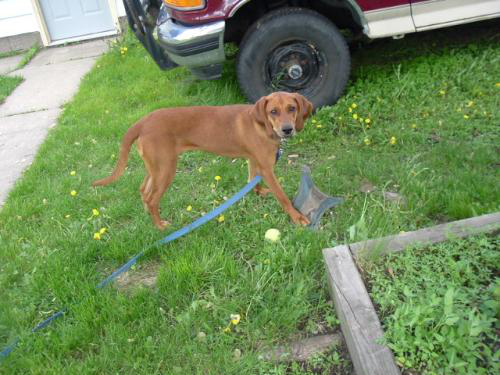

In [ ]:
dogs = list(pathlib.Path(dogs_dir).glob('*.jpg'))
print(PIL.Image.open(str(dogs[0])).size)
PIL.Image.open(str(dogs[0]))

**Print the second image from dogs directory**

(500, 375)


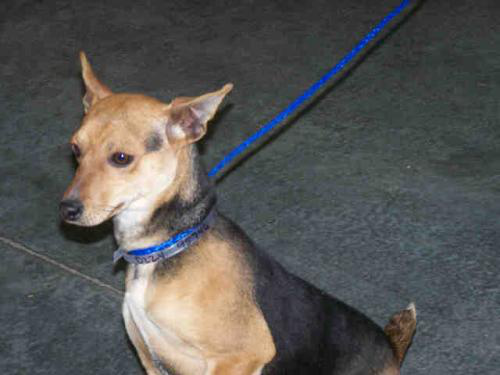

In [ ]:
print(PIL.Image.open(str(dogs[1])).size)
PIL.Image.open(str(dogs[1]))

**Print the last image from dogs directory**

(500, 375)


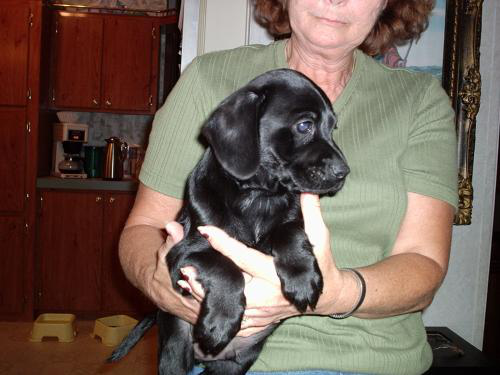

In [ ]:
print(PIL.Image.open(str(dogs[-1])).size)
PIL.Image.open(str(dogs[-1]))


# **Setup Training Set**

### **Allocating 80% of the data for training and 20% for validation.**

In [ ]:
batch_size = 32 
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(animals_dir),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(animals_dir),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11741 files belonging to 2 classes.
Using 9393 files for training.
Found 11741 files belonging to 2 classes.
Using 2348 files for validation.


### **Printing class names in the class_names attribute on the datasets.**

In [ ]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


# **Visualize the data**

**These are the first two images from the training dataset**


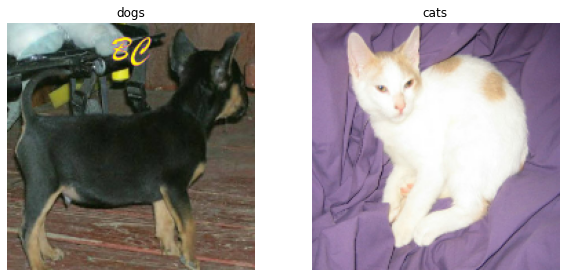

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(2):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# **Configure the datasets for performance**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the data

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


# **Create the model**

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# **Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Model summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

# **Train the model**

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
586/586 [==============================] - 613s 1s/step - loss: 0.5981 - accuracy: 0.6679 - val_loss: 0.5012 - val_accuracy: 0.7512
Epoch 2/10
586/586 [==============================] - 593s 1s/step - loss: 0.4677 - accuracy: 0.7758 - val_loss: 0.4866 - val_accuracy: 0.7708
Epoch 3/10
586/586 [==============================] - 593s 1s/step - loss: 0.3870 - accuracy: 0.8267 - val_loss: 0.5028 - val_accuracy: 0.7619
Epoch 4/10
586/586 [==============================] - 594s 1s/step - loss: 0.3029 - accuracy: 0.8686 - val_loss: 0.4632 - val_accuracy: 0.8041
Epoch 5/10
586/586 [==============================] - 595s 1s/step - loss: 0.2051 - accuracy: 0.9129 - val_loss: 0.4926 - val_accuracy: 0.8001
Epoch 6/10
586/586 [==============================] - 592s 1s/step - loss: 0.1157 - accuracy: 0.9574 - val_loss: 0.6695 - val_accuracy: 0.7954
Epoch 7/10
586/586 [==============================] - 588s 1s/step - loss: 0.0635 - accuracy: 0.9774 - val_loss: 0.8699 - val_accuracy: 0.8026

# **Visualize training results**

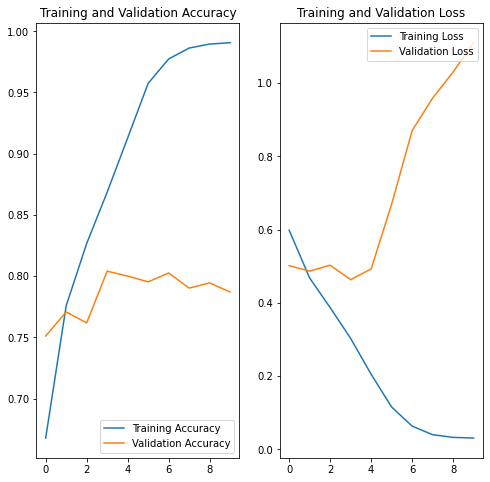

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Data augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

**Visualize a few augmented examples by applying data augmentation to the same image several times**

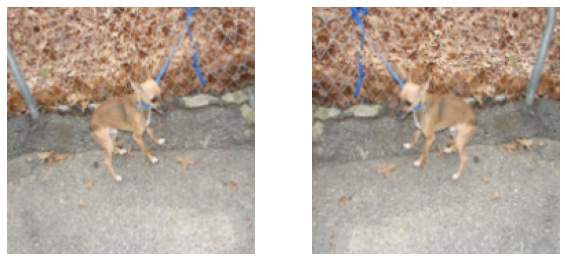

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(2):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# **Dropout**

In [ ]:
model = tf.keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

# **Compile and train the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
586/586 [==============================] - 679s 1s/step - loss: 0.6228 - accuracy: 0.6493 - val_loss: 0.5768 - val_accuracy: 0.6809
Epoch 2/15
586/586 [==============================] - 671s 1s/step - loss: 0.5452 - accuracy: 0.7228 - val_loss: 0.4787 - val_accuracy: 0.7655
Epoch 3/15
586/586 [==============================] - 668s 1s/step - loss: 0.5002 - accuracy: 0.7561 - val_loss: 0.4787 - val_accuracy: 0.7757
Epoch 4/15
586/586 [==============================] - 670s 1s/step - loss: 0.4666 - accuracy: 0.7800 - val_loss: 0.4466 - val_accuracy: 0.7915
Epoch 5/15
586/586 [==============================] - 669s 1s/step - loss: 0.4374 - accuracy: 0.7960 - val_loss: 0.4194 - val_accuracy: 0.8118
Epoch 6/15
586/586 [==============================] - 673s 1s/step - loss: 0.4273 - accuracy: 0.8022 - val_loss: 0.4046 - val_accuracy: 0.8208
Epoch 7/15
586/586 [==============================] - 666s 1s/step - loss: 0.4064 - accuracy: 0.8155 - val_loss: 0.3849 - val_accuracy: 0.8326

# **Visualize training results**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Accuracy of Model is 85%**

# **Save the Model**

This model will be saved in my google drive But you cand find this model inside 'saved_models' directory. 

**Important Tip for those who are running this script in google collab**:- https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2



In [ ]:
model.save('/content/drive/MyDrive/SavedModels/CatsVsDogsClassifier85.hdf5')

# **Load the Model**

In [ ]:
model = load_model('/content/drive/MyDrive/SavedModels/CatsVsDogsClassifier85.hdf5')

# **Test predictions based on model**

### **Dog Image**

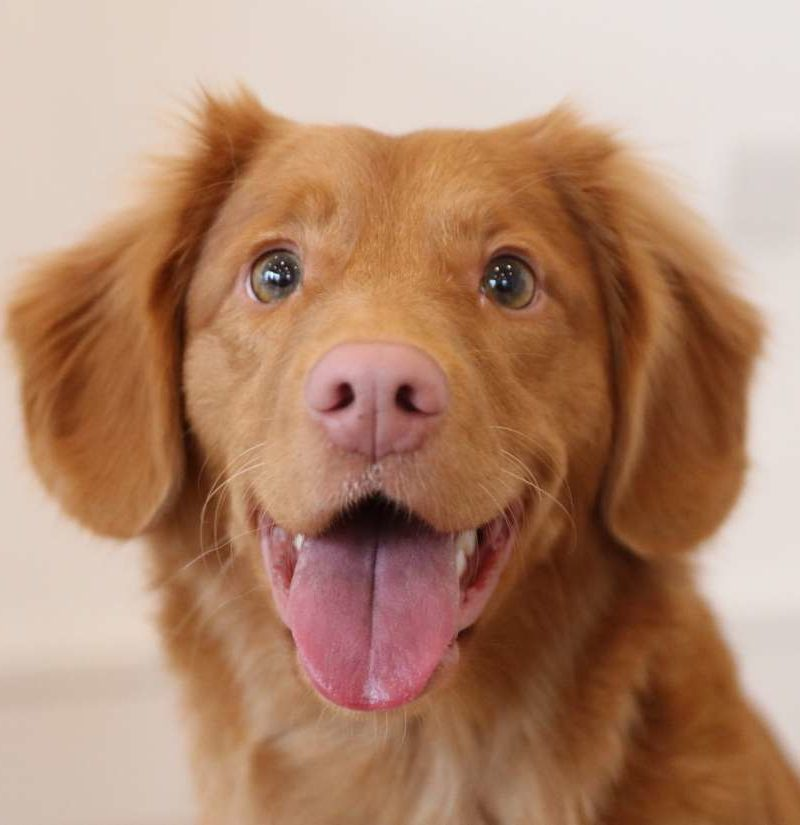

In [ ]:
sample_dog_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670419721/SampleDog2_t8wveo.jpg"
sample_dog_path = tf.keras.utils.get_file('SampleDog2_t8wveo', origin=sample_dog_url)

img = tf.keras.utils.load_img(
    sample_dog_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 36ms/step
This image most likely belongs to dogs with a 98.84 percent confidence.


### **Dog Image**

SampleDog_u8a66v.jpg

In [ ]:
sample_dog_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670423426/SampleDog_u8a66v.jpg"
sample_dog_path = tf.keras.utils.get_file('SampleDog_u8a66v', origin=sample_dog_url)

img = tf.keras.utils.load_img(
    sample_dog_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to dogs with a 100.00 percent confidence.


### **Cat Image**

SampleCat_dplrtv.jpg

In [ ]:
sample_cat_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670423426/SampleCat_dplrtv.jpg"
sample_cat_path = tf.keras.utils.get_file('SampleCat_dplrtv', origin=sample_cat_url)

img = tf.keras.utils.load_img(
    sample_cat_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 91ms/step
This image most likely belongs to cats with a 99.96 percent confidence.


### **Cat Image**

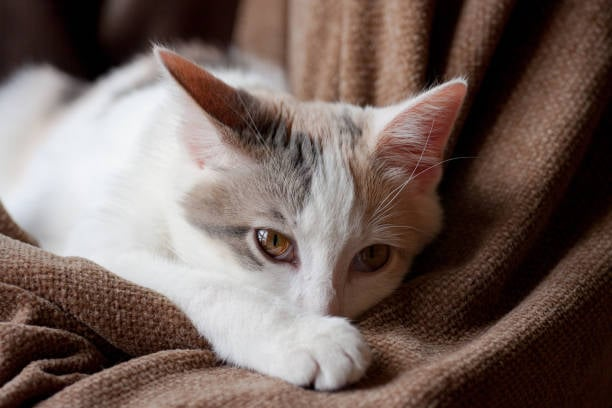

In [ ]:
sample_cat_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670423426/SampleCat2_jhayxv.jpg"
sample_cat_path = tf.keras.utils.get_file('SampleCat2_jhayxv', origin=sample_cat_url)

img = tf.keras.utils.load_img(
    sample_cat_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 85ms/step
This image most likely belongs to cats with a 99.88 percent confidence.


### **Cat Image**

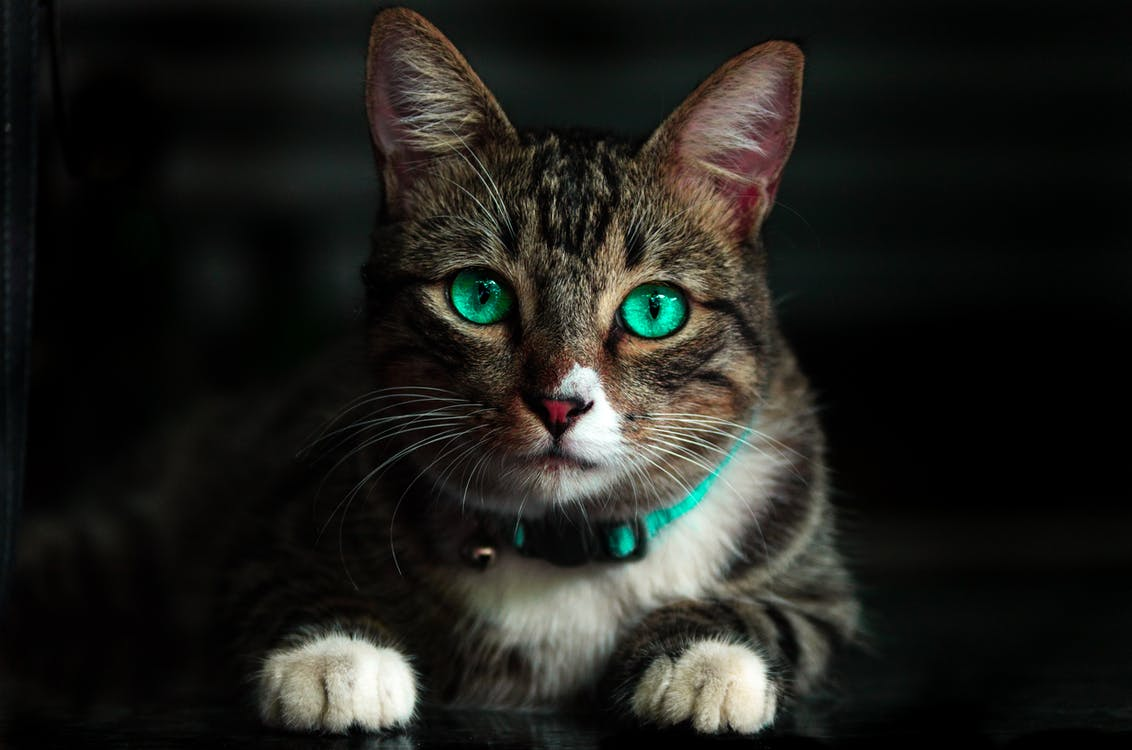

In [ ]:
sample_cat_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670423426/SampleCat_nkrxqg.jpg"
sample_cat_path = tf.keras.utils.get_file('SampleCat_nkrxqg', origin=sample_cat_url)

img = tf.keras.utils.load_img(
    sample_cat_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 35ms/step
This image most likely belongs to cats with a 99.85 percent confidence.


### **Dog Image**

SampleDog3_rtqlhc.jpg

In [ ]:
sample_dog_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670423827/SampleDog3_rtqlhc.jpg"
sample_dog_path = tf.keras.utils.get_file('SampleDog3_rtqlhc', origin=sample_dog_url)

img = tf.keras.utils.load_img(
    sample_dog_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 177ms/step
This image most likely belongs to dogs with a 99.91 percent confidence.


### **Dog looks like a Cat Image**

SampleImage_tfooxf.jpg

In [ ]:
sample_image_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670436080/SampleImage_tfooxf.jpg"
sample_image_path = tf.keras.utils.get_file('SampleImage_tfooxf', origin=sample_image_url)

img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to dogs with a 98.36 percent confidence.


### **Dog looks like Cat Image**

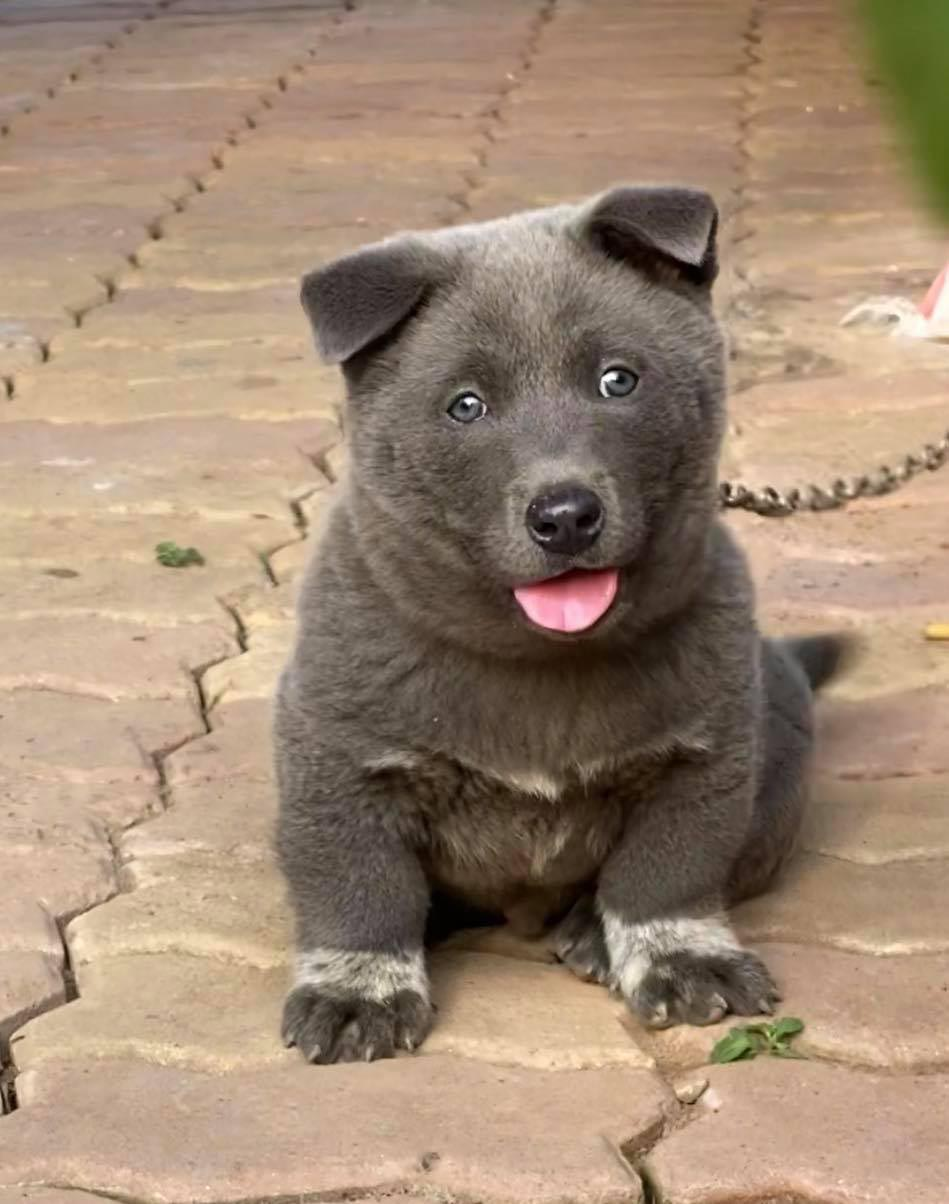

In [ ]:
sample_image_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670436080/Sample_axojms.jpg"
sample_image_path = tf.keras.utils.get_file('Sample_axojms', origin=sample_image_url)

img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to dogs with a 98.62 percent confidence.


### Cat looking like Dog **Image** **bold text**

SampleImage2_tbolyq.jpg

In [ ]:
sample_image_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670436416/SampleImage2_tbolyq.jpg"
sample_image_path = tf.keras.utils.get_file('SampleImage2_tbolyq', origin=sample_image_url)

img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 39ms/step
This image most likely belongs to cats with a 99.28 percent confidence.


### **Catwoman Image**

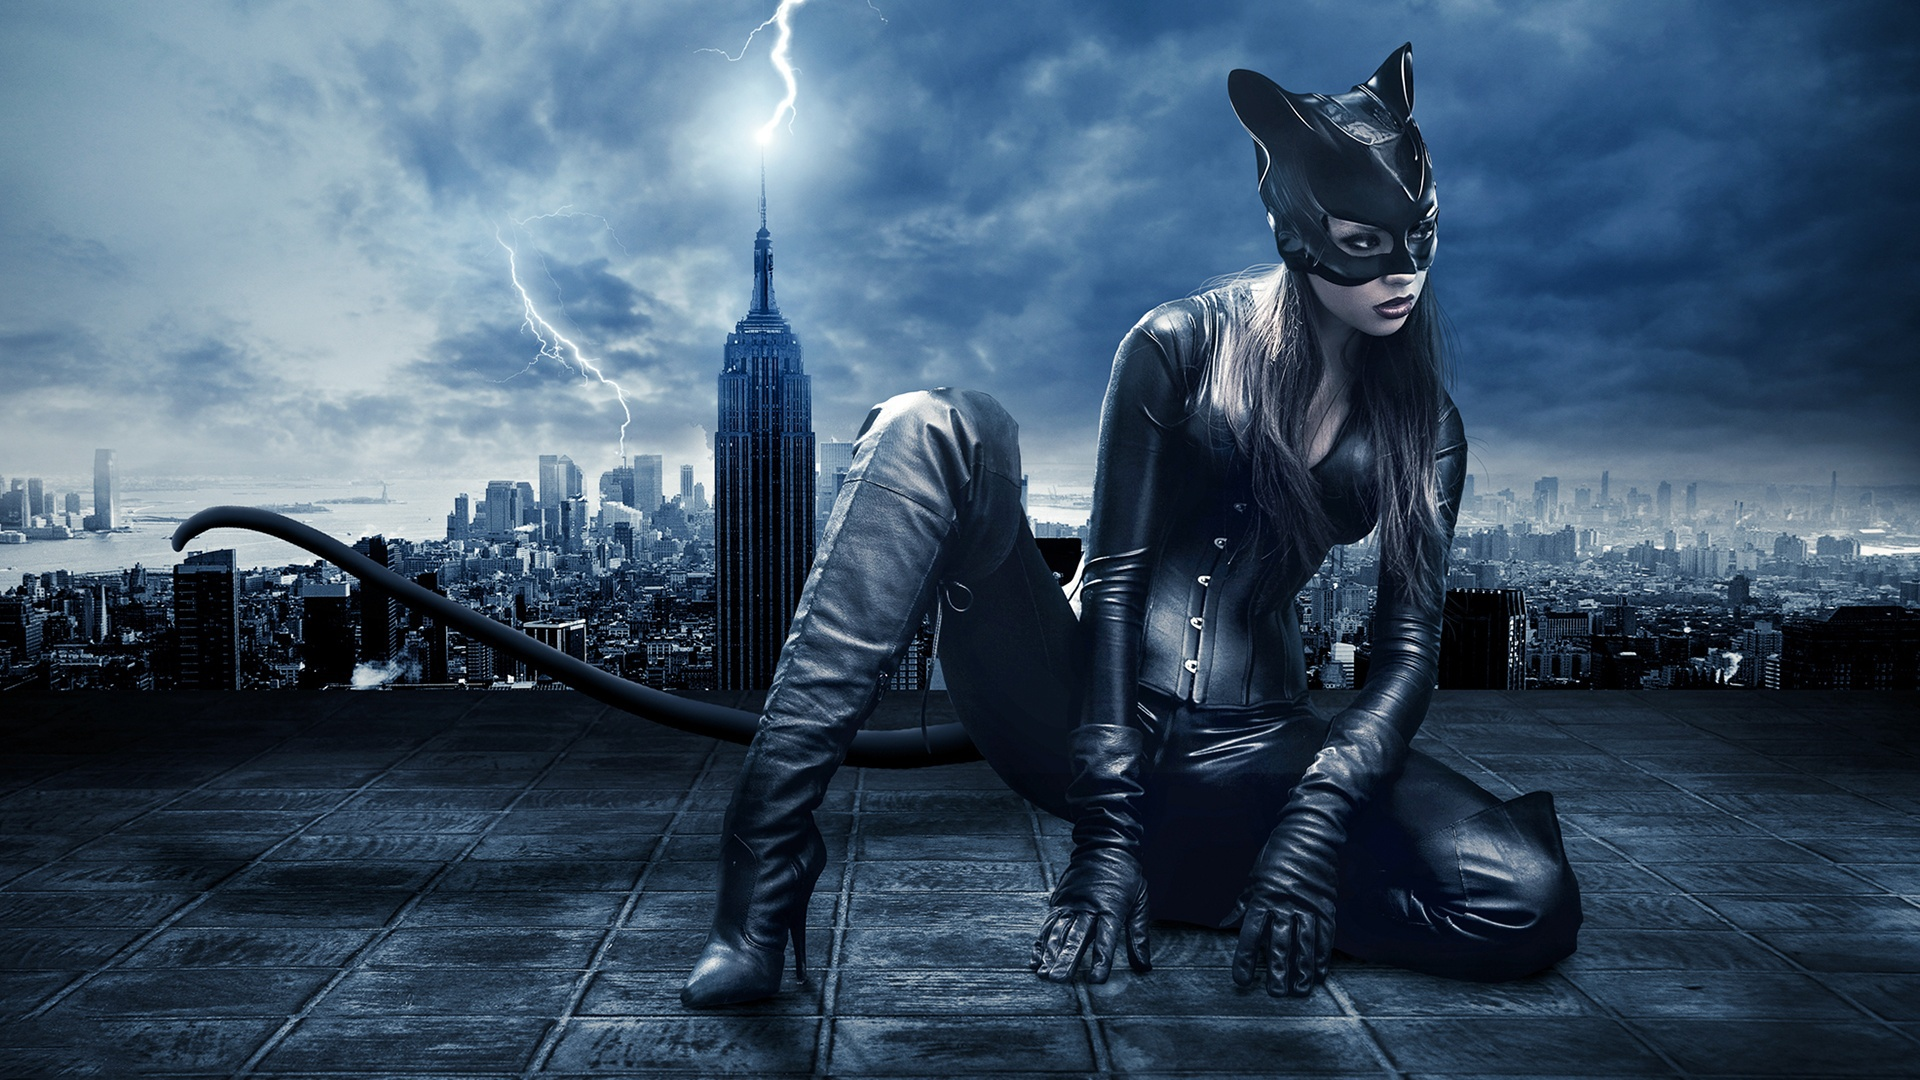

In [ ]:
sample_image_url = "https://res.cloudinary.com/sliit-academy/image/upload/v1670436416/SampleCatWoman_pt3lhb.jpg"
sample_image_path = tf.keras.utils.get_file('SampleCatWoman_pt3lhb', origin=sample_image_url)

img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 35ms/step
This image most likely belongs to cats with a 72.18 percent confidence.
